In [5]:
import serial
import matplotlib.pyplot as plt
import atexit
from time import sleep
import pandas as pd
import os
import os
print(os.environ['PATH'])

/usr/bin:/home/mv_yurchenko/.local/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin


# Подключаем Ардуино

### Открытие порта

In [7]:
serialArduino = serial.Serial("/dev/ttyUSB0", baudrate=115200 ,timeout=0.1)

### Определяем функцию, которая будет выполняться при закрытии сессии 

In [8]:
def exit_function():
    serialArduino.close()
    print("Закрываем Serial сессию")
    print("serialArduino.isOpen() = " + str(serialArduino.isOpen()))

### Подготовка ардуино к считыванию данных

In [9]:
sleep(3)

atexit.register(exit_function);

### Коэффициенты битовых преобразований

In [10]:
base_coeff = 255/5
collector_coeff = 4095/5

### Ввод данных

In [159]:
fixed = input("Что фиксируем?:")
fixed_voltage = float(input("Введите фиксированное напряжение(0-5В):"))
start = float(input("Введите начальное значение(0-5В):"))
stop = float(input("Введите конечное значеие(0-5В):"))

Что фиксируем?:b
Введите фиксированное напряжение(0-5В):4.1
Введите начальное значение(0-5В):0
Введите конечное значеие(0-5В):5


### Обработка введенных данных

In [160]:
## База : 256
## Коллектор : 4095
# columns = ['U', 'Ib', 'Ic']

if fixed[0].lower() == "b":
    is_base_fixed = True
else:
    is_base_fixed = False
is_collector_fixed = not is_base_fixed

if is_base_fixed:
    fixed_voltage = fixed_voltage*base_coeff
    start = start * collector_coeff
    stop = stop * collector_coeff
    what_fixed = "B"
if is_collector_fixed:
    fixed_voltage = fixed_voltage*collector_coeff
    start = start * base_coeff
    stop = stop * base_coeff
    what_fixed = "K"

### Генерация команы для ардуино

In [161]:
request = what_fixed + str(int(fixed_voltage)) + ","+ str(int(start))+ "," + str(int(stop))+"Q"
request

'B209,0,4095Q'

### Проверка готовности ардуино к работе

In [162]:
print("Готовность к  = " + str(serialArduino.isOpen()))

Готовность к  = True


### Отправляем команду на ардуино и считываем ответ 

In [163]:
serialArduino.write(request.encode("ASCII"))

serialArduino.flush()
values = list()

exit_fl = False

while not exit_fl:
    valueRead = serialArduino.readline()
    values.append(str(valueRead))
    print(valueRead)
    if b">" in valueRead:
        exit_fl = True

b'B209,0,4095Q0;0.000110;0.000000;0.557185;0.000000\r\n'
b'1;0.000110;0.000000;0.557185;0.000000\r\n'
b'2;0.000110;0.000000;0.557185;0.000000\r\n'
b'3;0.000110;0.000000;0.557185;0.000000\r\n'
b'4;0.000110;0.000000;0.557185;0.000000\r\n'
b'5;0.000110;0.000000;0.557185;0.000000\r\n'
b'6;0.000110;0.000000;0.557185;0.000000\r\n'
b'7;0.000110;0.000000;0.557185;0.000000\r\n'
b'8;0.000110;0.000000;0.557185;0.000000\r\n'
b'9;0.000110;0.000010;0.557185;0.000000\r\n'
b'10;0.000110;0.000010;0.557185;0.000000\r\n'
b'11;0.000110;0.000010;0.557185;0.000000\r\n'
b'12;0.000110;0.000010;0.557185;0.000000\r\n'
b'13;0.000110;0.000010;0.557185;0.000000\r\n'
b'14;0.000110;0.000021;0.557185;0.000000\r\n'
b'15;0.000110;0.000021;0.557185;0.000000\r\n'
b'16;0.000110;0.000010;0.557185;0.004888\r\n'
b'17;0.000105;0.000010;0.562072;0.004888\r\n'
b'18;0.000105;0.000021;0.562072;0.004888\r\n'
b'19;0.000105;0.000021;0.562072;0.004888\r\n'
b'20;0.000105;0.000021;0.562072;0.004888\r\n'
b'21;0.000105;0.000021;0.562072;

b'190;0.000084;0.000416;0.581623;0.029326\r\n'
b'191;0.000084;0.000416;0.581623;0.029326\r\n'
b'192;0.000084;0.000426;0.581623;0.029326\r\n'
b'193;0.000084;0.000426;0.581623;0.029326\r\n'
b'194;0.000089;0.000426;0.576735;0.029326\r\n'
b'195;0.000084;0.000426;0.581623;0.029326\r\n'
b'196;0.000084;0.000437;0.581623;0.029326\r\n'
b'197;0.000084;0.000437;0.581623;0.029326\r\n'
b'198;0.000084;0.000426;0.581623;0.034213\r\n'
b'199;0.000084;0.000437;0.581623;0.034213\r\n'
b'200;0.000084;0.000447;0.581623;0.029326\r\n'
b'201;0.000084;0.000437;0.581623;0.034213\r\n'
b'202;0.000084;0.000437;0.581623;0.034213\r\n'
b'203;0.000084;0.000458;0.581623;0.029326\r\n'
b'204;0.000084;0.000458;0.581623;0.029326\r\n'
b'205;0.000084;0.000447;0.581623;0.034213\r\n'
b'206;0.000084;0.000458;0.581623;0.029326\r\n'
b'207;0.000084;0.000458;0.581623;0.034213\r\n'
b'208;0.000084;0.000458;0.581623;0.034213\r\n'
b'209;0.000084;0.000458;0.581623;0.034213\r\n'
b'210;0.000084;0.000458;0.581623;0.034213\r\n'
b'211;0.00008

b'378;0.000067;0.000863;0.596285;0.053763\r\n'
b'379;0.000067;0.000863;0.596285;0.053763\r\n'
b'380;0.000067;0.000874;0.596285;0.053763\r\n'
b'381;0.000067;0.000874;0.596285;0.053763\r\n'
b'382;0.000073;0.000874;0.591398;0.053763\r\n'
b'383;0.000073;0.000874;0.591398;0.053763\r\n'
b'384;0.000073;0.000894;0.591398;0.048876\r\n'
b'385;0.000073;0.000884;0.591398;0.053763\r\n'
b'386;0.000067;0.000884;0.596285;0.053763\r\n'
b'387;0.000067;0.000884;0.596285;0.053763\r\n'
b'388;0.000067;0.000894;0.596285;0.053763\r\n'
b'389;0.000067;0.000894;0.596285;0.053763\r\n'
b'390;0.000067;0.000894;0.596285;0.053763\r\n'
b'391;0.000067;0.000894;0.596285;0.053763\r\n'
b'392;0.000067;0.000905;0.596285;0.053763\r\n'
b'393;0.000067;0.000905;0.596285;0.053763\r\n'
b'394;0.000068;0.000905;0.596285;0.053763\r\n'
b'395;0.000068;0.000905;0.596285;0.053763\r\n'
b'396;0.000067;0.000905;0.596285;0.053763\r\n'
b'397;0.000067;0.000915;0.596285;0.053763\r\n'
b'398;0.000067;0.000915;0.596285;0.053763\r\n'
b'399;0.00006

b'566;0.000057;0.001331;0.606061;0.068426\r\n'
b'567;0.000057;0.001331;0.606061;0.068426\r\n'
b'568;0.000063;0.001341;0.601173;0.068426\r\n'
b'569;0.000057;0.001341;0.606061;0.068426\r\n'
b'570;0.000057;0.001341;0.606061;0.068426\r\n'
b'571;0.000057;0.001341;0.606061;0.068426\r\n'
b'572;0.000057;0.001352;0.606061;0.068426\r\n'
b'573;0.000057;0.001352;0.606061;0.068426\r\n'
b'574;0.000057;0.001352;0.606061;0.068426\r\n'
b'575;0.000057;0.001352;0.606061;0.068426\r\n'
b'576;0.000057;0.001341;0.606061;0.073314\r\n'
b'577;0.000057;0.001362;0.606061;0.068426\r\n'
b'578;0.000056;0.001362;0.606061;0.068426\r\n'
b'579;0.000056;0.001362;0.606061;0.068426\r\n'
b'580;0.000057;0.001373;0.606061;0.068426\r\n'
b'581;0.000057;0.001373;0.606061;0.068426\r\n'
b'582;0.000057;0.001373;0.606061;0.068426\r\n'
b'583;0.000057;0.001373;0.606061;0.068426\r\n'
b'584;0.000057;0.001373;0.606061;0.073314\r\n'
b'585;0.000057;0.001383;0.606061;0.068426\r\n'
b'586;0.000057;0.001383;0.606061;0.068426\r\n'
b'587;0.00005

b'754;0.000052;0.001789;0.610948;0.083089\r\n'
b'755;0.000052;0.001789;0.610948;0.083089\r\n'
b'756;0.000052;0.001789;0.610948;0.083089\r\n'
b'757;0.000052;0.001799;0.610948;0.083089\r\n'
b'758;0.000052;0.001799;0.610948;0.083089\r\n'
b'759;0.000052;0.001799;0.610948;0.083089\r\n'
b'760;0.000046;0.001799;0.615836;0.083089\r\n'
b'761;0.000052;0.001809;0.610948;0.083089\r\n'
b'762;0.000052;0.001809;0.610948;0.083089\r\n'
b'763;0.000052;0.001809;0.610948;0.083089\r\n'
b'764;0.000046;0.001809;0.615836;0.083089\r\n'
b'765;0.000052;0.001820;0.610948;0.083089\r\n'
b'766;0.000052;0.001820;0.610948;0.083089\r\n'
b'767;0.000052;0.001820;0.610948;0.083089\r\n'
b'768;0.000052;0.001820;0.610948;0.083089\r\n'
b'769;0.000052;0.001830;0.610948;0.083089\r\n'
b'770;0.000052;0.001830;0.610948;0.083089\r\n'
b'771;0.000052;0.001830;0.610948;0.083089\r\n'
b'772;0.000046;0.001830;0.615836;0.083089\r\n'
b'773;0.000046;0.001841;0.615836;0.083089\r\n'
b'774;0.000052;0.001841;0.610948;0.083089\r\n'
b'775;0.00005

b'942;0.000041;0.002246;0.620723;0.097752\r\n'
b'943;0.000041;0.002257;0.620723;0.092864\r\n'
b'944;0.000041;0.002267;0.620723;0.092864\r\n'
b'945;0.000046;0.002257;0.615836;0.097752\r\n'
b'946;0.000041;0.002257;0.620723;0.097752\r\n'
b'947;0.000041;0.002257;0.620723;0.097752\r\n'
b'948;0.000041;0.002267;0.620723;0.097752\r\n'
b'949;0.000041;0.002267;0.620723;0.097752\r\n'
b'950;0.000041;0.002267;0.620723;0.097752\r\n'
b'951;0.000041;0.002277;0.620723;0.097752\r\n'
b'952;0.000041;0.002277;0.620723;0.097752\r\n'
b'953;0.000041;0.002277;0.620723;0.097752\r\n'
b'954;0.000041;0.002277;0.620723;0.097752\r\n'
b'955;0.000041;0.002277;0.620723;0.097752\r\n'
b'956;0.000041;0.002288;0.620723;0.097752\r\n'
b'957;0.000041;0.002288;0.620723;0.097752\r\n'
b'958;0.000041;0.002288;0.620723;0.097752\r\n'
b'959;0.000041;0.002288;0.620723;0.097752\r\n'
b'960;0.000041;0.002288;0.620723;0.097752\r\n'
b'961;0.000041;0.002298;0.620723;0.097752\r\n'
b'962;0.000041;0.002298;0.620723;0.097752\r\n'
b'963;0.00004

b'1127;0.000035;0.002714;0.625611;0.112414\r\n'
b'1128;0.000035;0.002714;0.625611;0.112414\r\n'
b'1129;0.000035;0.002714;0.625611;0.112414\r\n'
b'1130;0.000035;0.002725;0.625611;0.112414\r\n'
b'1131;0.000036;0.002725;0.625611;0.112414\r\n'
b'1132;0.000035;0.002725;0.625611;0.112414\r\n'
b'1133;0.000035;0.002725;0.625611;0.112414\r\n'
b'1134;0.000035;0.002735;0.625611;0.112414\r\n'
b'1135;0.000035;0.002745;0.625611;0.107527\r\n'
b'1136;0.000035;0.002735;0.625611;0.112414\r\n'
b'1137;0.000035;0.002735;0.625611;0.112414\r\n'
b'1138;0.000036;0.002745;0.625611;0.112414\r\n'
b'1139;0.000035;0.002745;0.625611;0.112414\r\n'
b'1140;0.000035;0.002745;0.625611;0.112414\r\n'
b'1141;0.000035;0.002745;0.625611;0.112414\r\n'
b'1142;0.000035;0.002756;0.625611;0.112414\r\n'
b'1143;0.000035;0.002756;0.625611;0.112414\r\n'
b'1144;0.000035;0.002756;0.625611;0.112414\r\n'
b'1145;0.000035;0.002756;0.625611;0.112414\r\n'
b'1146;0.000035;0.002766;0.625611;0.112414\r\n'
b'1147;0.000036;0.002766;0.625611;0.1124

b'1312;0.000031;0.003172;0.630498;0.127077\r\n'
b'1313;0.000031;0.003172;0.630498;0.127077\r\n'
b'1314;0.000031;0.003172;0.630498;0.127077\r\n'
b'1315;0.000030;0.003172;0.630498;0.127077\r\n'
b'1316;0.000031;0.003182;0.630498;0.127077\r\n'
b'1317;0.000031;0.003182;0.630498;0.127077\r\n'
b'1318;0.000031;0.003182;0.630498;0.127077\r\n'
b'1319;0.000031;0.003182;0.630498;0.127077\r\n'
b'1320;0.000031;0.003193;0.630498;0.127077\r\n'
b'1321;0.000030;0.003193;0.630498;0.127077\r\n'
b'1322;0.000031;0.003193;0.630498;0.127077\r\n'
b'1323;0.000031;0.003203;0.630498;0.127077\r\n'
b'1324;0.000030;0.003203;0.630498;0.127077\r\n'
b'1325;0.000030;0.003203;0.630498;0.127077\r\n'
b'1326;0.000031;0.003203;0.630498;0.127077\r\n'
b'1327;0.000030;0.003203;0.630498;0.127077\r\n'
b'1328;0.000031;0.003213;0.630498;0.127077\r\n'
b'1329;0.000031;0.003213;0.630498;0.127077\r\n'
b'1330;0.000031;0.003213;0.630498;0.127077\r\n'
b'1331;0.000031;0.003203;0.630498;0.131965\r\n'
b'1332;0.000031;0.003224;0.630498;0.1270

b'1495;0.000026;0.003588;0.635386;0.151515\r\n'
b'1496;0.000026;0.003608;0.635386;0.146628\r\n'
b'1497;0.000024;0.003608;0.635386;0.146628\r\n'
b'1498;0.000026;0.003608;0.635386;0.146628\r\n'
b'1499;0.000026;0.003619;0.635386;0.146628\r\n'
b'1500;0.000026;0.003619;0.635386;0.146628\r\n'
b'1501;0.000026;0.003619;0.635386;0.146628\r\n'
b'1502;0.000026;0.003608;0.635386;0.151515\r\n'
b'1503;0.000026;0.003619;0.635386;0.146628\r\n'
b'1504;0.000026;0.003629;0.635386;0.146628\r\n'
b'1505;0.000026;0.003619;0.635386;0.151515\r\n'
b'1506;0.000026;0.003619;0.635386;0.151515\r\n'
b'1507;0.000026;0.003629;0.635386;0.151515\r\n'
b'1508;0.000026;0.003640;0.635386;0.146628\r\n'
b'1509;0.000026;0.003640;0.635386;0.146628\r\n'
b'1510;0.000026;0.003629;0.635386;0.151515\r\n'
b'1511;0.000026;0.003640;0.635386;0.151515\r\n'
b'1512;0.000026;0.003640;0.635386;0.151515\r\n'
b'1513;0.000026;0.003640;0.635386;0.151515\r\n'
b'1514;0.000026;0.003640;0.635386;0.151515\r\n'
b'1515;0.000026;0.003650;0.635386;0.1515

b'1679;0.000020;0.004014;0.640274;0.180841\r\n'
b'1680;0.000026;0.004014;0.635386;0.180841\r\n'
b'1681;0.000026;0.004014;0.635386;0.180841\r\n'
b'1682;0.000020;0.004014;0.640274;0.180841\r\n'
b'1683;0.000020;0.004024;0.640274;0.180841\r\n'
b'1684;0.000026;0.004014;0.635386;0.185728\r\n'
b'1685;0.000020;0.004014;0.640274;0.185728\r\n'
b'1686;0.000020;0.004014;0.640274;0.185728\r\n'
b'1687;0.000020;0.004035;0.640274;0.180841\r\n'
b'1688;0.000020;0.004024;0.640274;0.185728\r\n'
b'1689;0.000020;0.004035;0.640274;0.180841\r\n'
b'1690;0.000020;0.004035;0.640274;0.180841\r\n'
b'1691;0.000020;0.004035;0.640274;0.185728\r\n'
b'1692;0.000020;0.004035;0.640274;0.185728\r\n'
b'1693;0.000020;0.004035;0.640274;0.185728\r\n'
b'1694;0.000020;0.004035;0.640274;0.185728\r\n'
b'1695;0.000020;0.004045;0.640274;0.185728\r\n'
b'1696;0.000020;0.004035;0.640274;0.190616\r\n'
b'1697;0.000020;0.004035;0.640274;0.190616\r\n'
b'1698;0.000020;0.004045;0.640274;0.190616\r\n'
b'1699;0.000020;0.004056;0.640274;0.1857

b'1863;0.000020;0.004191;0.640274;0.317693\r\n'
b'1864;0.000020;0.004191;0.640274;0.322581\r\n'
b'1865;0.000020;0.004201;0.640274;0.317693\r\n'
b'1866;0.000020;0.004191;0.640274;0.322581\r\n'
b'1867;0.000020;0.004170;0.640274;0.332356\r\n'
b'1868;0.000020;0.004232;0.640274;0.307918\r\n'
b'1869;0.000020;0.004232;0.640274;0.307918\r\n'
b'1870;0.000020;0.004243;0.640274;0.303030\r\n'
b'1871;0.000020;0.004180;0.640274;0.332356\r\n'
b'1872;0.000020;0.004191;0.640274;0.332356\r\n'
b'1873;0.000020;0.004201;0.640274;0.327468\r\n'
b'1874;0.000020;0.004191;0.640274;0.332356\r\n'
b'1875;0.000020;0.004191;0.640274;0.332356\r\n'
b'1876;0.000020;0.004201;0.640274;0.332356\r\n'
b'1877;0.000020;0.004212;0.640274;0.327468\r\n'
b'1878;0.000020;0.004191;0.640274;0.337243\r\n'
b'1879;0.000020;0.004212;0.640274;0.327468\r\n'
b'1880;0.000020;0.004232;0.640274;0.322581\r\n'
b'1881;0.000020;0.004180;0.640274;0.347019\r\n'
b'1882;0.000020;0.004180;0.640274;0.347019\r\n'
b'1883;0.000020;0.004180;0.640274;0.3470

b'2047;0.000020;0.004243;0.640274;0.522972\r\n'
b'2048;0.000020;0.004222;0.640274;0.532747\r\n'
b'2049;0.000020;0.004326;0.640274;0.488759\r\n'
b'2050;0.000020;0.004180;0.640274;0.557185\r\n'
b'2051;0.000020;0.004222;0.640274;0.537634\r\n'
b'2052;0.000020;0.004243;0.640274;0.527859\r\n'
b'2053;0.000020;0.004295;0.640274;0.508309\r\n'
b'2054;0.000020;0.004326;0.640274;0.493646\r\n'
b'2055;0.000020;0.004326;0.640274;0.493646\r\n'
b'2056;0.000020;0.004305;0.640274;0.503421\r\n'
b'2057;0.000020;0.004336;0.640274;0.493646\r\n'
b'2058;0.000020;0.004368;0.640274;0.478983\r\n'
b'2059;0.000020;0.004284;0.640274;0.518084\r\n'
b'2060;0.000020;0.004264;0.640274;0.527859\r\n'
b'2061;0.000020;0.004253;0.640274;0.537634\r\n'
b'2062;0.000020;0.004212;0.640274;0.557185\r\n'
b'2063;0.000020;0.004212;0.640274;0.557185\r\n'
b'2064;0.000020;0.004305;0.640274;0.513196\r\n'
b'2065;0.000020;0.004368;0.640274;0.488759\r\n'
b'2066;0.000020;0.004253;0.640274;0.542522\r\n'
b'2067;0.000020;0.004232;0.640274;0.5522

b'2231;0.000020;0.004253;0.640274;0.742913\r\n'
b'2232;0.000020;0.004284;0.640274;0.728250\r\n'
b'2233;0.000020;0.004284;0.640274;0.733138\r\n'
b'2234;0.000020;0.004264;0.640274;0.742913\r\n'
b'2235;0.000020;0.004243;0.640274;0.752688\r\n'
b'2236;0.000020;0.004232;0.640274;0.757576\r\n'
b'2237;0.000020;0.004253;0.640274;0.752688\r\n'
b'2238;0.000020;0.004305;0.640274;0.728250\r\n'
b'2239;0.000020;0.004264;0.640274;0.747801\r\n'
b'2240;0.000020;0.004326;0.640274;0.718475\r\n'
b'2241;0.000020;0.004347;0.640274;0.713587\r\n'
b'2242;0.000020;0.004295;0.640274;0.738025\r\n'
b'2243;0.000020;0.004232;0.640274;0.767351\r\n'
b'2244;0.000020;0.004253;0.640274;0.757576\r\n'
b'2245;0.000020;0.004222;0.640274;0.777126\r\n'
b'2246;0.000020;0.004274;0.640274;0.752688\r\n'
b'2247;0.000020;0.004295;0.640274;0.742913\r\n'
b'2248;0.000020;0.004264;0.640274;0.757576\r\n'
b'2249;0.000020;0.004264;0.640274;0.762463\r\n'
b'2250;0.000020;0.004274;0.640274;0.757576\r\n'
b'2251;0.000020;0.004305;0.640274;0.7429

b'2415;0.000020;0.004274;0.640274;0.962854\r\n'
b'2416;0.000020;0.004295;0.640274;0.953079\r\n'
b'2417;0.000020;0.004326;0.640274;0.938416\r\n'
b'2418;0.000020;0.004326;0.640274;0.938416\r\n'
b'2419;0.000020;0.004305;0.640274;0.953079\r\n'
b'2420;0.000020;0.004336;0.640274;0.938416\r\n'
b'2421;0.000020;0.004378;0.640274;0.918866\r\n'
b'2422;0.000020;0.004295;0.640274;0.957967\r\n'
b'2423;0.000020;0.004274;0.640274;0.972630\r\n'
b'2424;0.000020;0.004274;0.640274;0.972630\r\n'
b'2425;0.000020;0.004295;0.640274;0.962854\r\n'
b'2426;0.000020;0.004347;0.640274;0.938416\r\n'
b'2427;0.000020;0.004368;0.640274;0.933529\r\n'
b'2428;0.000020;0.004368;0.640274;0.933529\r\n'
b'2429;0.000020;0.004222;0.640274;1.001955\r\n'
b'2430;0.000020;0.004243;0.640274;0.992180\r\n'
b'2431;0.000020;0.004274;0.640274;0.982405\r\n'
b'2432;0.000020;0.004243;0.640274;0.997067\r\n'
b'2433;0.000020;0.004201;0.640274;1.016618\r\n'
b'2434;0.000020;0.004243;0.640274;0.997067\r\n'
b'2435;0.000020;0.004284;0.640274;0.9824

b'2599;0.000020;0.004264;0.640274;1.192571\r\n'
b'2600;0.000020;0.004295;0.640274;1.182796\r\n'
b'2601;0.000020;0.004295;0.640274;1.182796\r\n'
b'2602;0.000020;0.004368;0.640274;1.148583\r\n'
b'2603;0.000020;0.004295;0.640274;1.182796\r\n'
b'2604;0.000020;0.004316;0.640274;1.177908\r\n'
b'2605;0.000020;0.004326;0.640274;1.173020\r\n'
b'2606;0.000020;0.004336;0.640274;1.168133\r\n'
b'2607;0.000020;0.004305;0.640274;1.182796\r\n'
b'2608;0.000020;0.004274;0.640274;1.202346\r\n'
b'2609;0.000020;0.004284;0.640274;1.197458\r\n'
b'2610;0.000020;0.004336;0.640274;1.173020\r\n'
b'2611;0.000020;0.004295;0.640274;1.192571\r\n'
b'2612;0.000020;0.004295;0.640274;1.197458\r\n'
b'2613;0.000020;0.004274;0.640274;1.207234\r\n'
b'2614;0.000020;0.004284;0.640274;1.202346\r\n'
b'2615;0.000020;0.004274;0.640274;1.207234\r\n'
b'2616;0.000020;0.004336;0.640274;1.182796\r\n'
b'2617;0.000020;0.004284;0.640274;1.207234\r\n'
b'2618;0.000020;0.004295;0.640274;1.202346\r\n'
b'2619;0.000020;0.004264;0.640274;1.2170

b'2783;0.000020;0.004316;0.640274;1.397849\r\n'
b'2784;0.000020;0.004336;0.640274;1.392962\r\n'
b'2785;0.000020;0.004295;0.640274;1.412512\r\n'
b'2786;0.000020;0.004305;0.640274;1.407625\r\n'
b'2787;0.000020;0.004326;0.640274;1.402737\r\n'
b'2788;0.000020;0.004316;0.640274;1.407625\r\n'
b'2789;0.000020;0.004316;0.640274;1.407625\r\n'
b'2790;0.000020;0.004430;0.640274;1.353861\r\n'
b'2791;0.000020;0.004378;0.640274;1.383187\r\n'
b'2792;0.000020;0.004388;0.640274;1.378299\r\n'
b'2793;0.000020;0.004326;0.640274;1.407625\r\n'
b'2794;0.000020;0.004284;0.640274;1.427175\r\n'
b'2795;0.000020;0.004305;0.640274;1.422287\r\n'
b'2796;0.000020;0.004305;0.640274;1.422287\r\n'
b'2797;0.000020;0.004284;0.640274;1.432063\r\n'
b'2798;0.000020;0.004274;0.640274;1.436950\r\n'
b'2799;0.000020;0.004305;0.640274;1.422287\r\n'
b'2800;0.000020;0.004316;0.640274;1.422287\r\n'
b'2801;0.000020;0.004305;0.640274;1.427175\r\n'
b'2802;0.000020;0.004388;0.640274;1.388074\r\n'
b'2803;0.000020;0.004347;0.640274;1.4125

b'2967;0.000020;0.004316;0.640274;1.622678\r\n'
b'2968;0.000020;0.004326;0.640274;1.617791\r\n'
b'2969;0.000020;0.004316;0.640274;1.622678\r\n'
b'2970;0.000020;0.004368;0.640274;1.603128\r\n'
b'2971;0.000020;0.004440;0.640274;1.568915\r\n'
b'2972;0.000020;0.004399;0.640274;1.588465\r\n'
b'2973;0.000020;0.004409;0.640274;1.588465\r\n'
b'2974;0.000020;0.004388;0.640274;1.598240\r\n'
b'2975;0.000020;0.004378;0.640274;1.603128\r\n'
b'2976;0.000020;0.004336;0.640274;1.622678\r\n'
b'2977;0.000020;0.004336;0.640274;1.622678\r\n'
b'2978;0.000020;0.004357;0.640274;1.617791\r\n'
b'2979;0.000020;0.004388;0.640274;1.603128\r\n'
b'2980;0.000020;0.004461;0.640274;1.568915\r\n'
b'2981;0.000020;0.004357;0.640274;1.617791\r\n'
b'2982;0.000020;0.004316;0.640274;1.642229\r\n'
b'2983;0.000020;0.004326;0.640274;1.637341\r\n'
b'2984;0.000020;0.004326;0.640274;1.637341\r\n'
b'2985;0.000020;0.004316;0.640274;1.642229\r\n'
b'2986;0.000020;0.004347;0.640274;1.632454\r\n'
b'2987;0.000020;0.004368;0.640274;1.6226

b'3151;0.000020;0.004305;0.640274;1.852395\r\n'
b'3152;0.000020;0.004274;0.640274;1.867058\r\n'
b'3153;0.000020;0.004336;0.640274;1.842620\r\n'
b'3154;0.000020;0.004388;0.640274;1.818182\r\n'
b'3155;0.000020;0.004316;0.640274;1.852395\r\n'
b'3156;0.000020;0.004357;0.640274;1.832845\r\n'
b'3157;0.000020;0.004357;0.640274;1.837732\r\n'
b'3158;0.000020;0.004305;0.640274;1.862170\r\n'
b'3159;0.000020;0.004284;0.640274;1.871945\r\n'
b'3160;0.000020;0.004399;0.640274;1.818182\r\n'
b'3161;0.000020;0.004316;0.640274;1.862170\r\n'
b'3162;0.000020;0.004326;0.640274;1.857283\r\n'
b'3163;0.000020;0.004326;0.640274;1.857283\r\n'
b'3164;0.000020;0.004305;0.640274;1.867058\r\n'
b'3165;0.000020;0.004284;0.640274;1.881720\r\n'
b'3166;0.000020;0.004295;0.640274;1.876833\r\n'
b'3167;0.000020;0.004326;0.640274;1.862170\r\n'
b'3168;0.000020;0.004316;0.640274;1.867058\r\n'
b'3169;0.000020;0.004378;0.640274;1.842620\r\n'
b'3170;0.000020;0.004357;0.640274;1.852395\r\n'
b'3171;0.000020;0.004357;0.640274;1.8523

b'3336;0.000020;0.004347;0.640274;2.057673\r\n'
b'3337;0.000020;0.004326;0.640274;2.067449\r\n'
b'3338;0.000020;0.004368;0.640274;2.052786\r\n'
b'3339;0.000020;0.004336;0.640274;2.067449\r\n'
b'3340;0.000020;0.004368;0.640274;2.052786\r\n'
b'3341;0.000020;0.004368;0.640274;2.052786\r\n'
b'3342;0.000020;0.004378;0.640274;2.047898\r\n'
b'3343;0.000020;0.004440;0.640274;2.023460\r\n'
b'3344;0.000020;0.004420;0.640274;2.033236\r\n'
b'3345;0.000020;0.004347;0.640274;2.067449\r\n'
b'3346;0.000020;0.004336;0.640274;2.072336\r\n'
b'3347;0.000020;0.004430;0.640274;2.028348\r\n'
b'3348;0.000020;0.004326;0.640274;2.082111\r\n'
b'3349;0.000020;0.004378;0.640274;2.057673\r\n'
b'3350;0.000020;0.004420;0.640274;2.038123\r\n'
b'3351;0.000020;0.004368;0.640274;2.067449\r\n'
b'3352;0.000020;0.004378;0.640274;2.062561\r\n'
b'3353;0.000020;0.004347;0.640274;2.077224\r\n'
b'3354;0.000020;0.004326;0.640274;2.086999\r\n'
b'3355;0.000020;0.004336;0.640274;2.086999\r\n'
b'3356;0.000020;0.004347;0.640274;2.0821

b'3520;0.000020;0.004378;0.640274;2.267840\r\n'
b'3521;0.000020;0.004336;0.640274;2.287390\r\n'
b'3522;0.000020;0.004399;0.640274;2.262952\r\n'
b'3523;0.000020;0.004430;0.640274;2.248289\r\n'
b'3524;0.000020;0.004534;0.640274;2.199414\r\n'
b'3525;0.000020;0.004461;0.640274;2.233627\r\n'
b'3526;0.000020;0.004461;0.640274;2.238514\r\n'
b'3527;0.000020;0.004357;0.640274;2.287390\r\n'
b'3528;0.000020;0.004336;0.640274;2.297165\r\n'
b'3529;0.000020;0.004368;0.640274;2.287390\r\n'
b'3530;0.000020;0.004409;0.640274;2.267840\r\n'
b'3531;0.000020;0.004420;0.640274;2.262952\r\n'
b'3532;0.000020;0.004378;0.640274;2.282502\r\n'
b'3533;0.000020;0.004357;0.640274;2.297165\r\n'
b'3534;0.000020;0.004388;0.640274;2.282502\r\n'
b'3535;0.000020;0.004305;0.640274;2.321603\r\n'
b'3536;0.000020;0.004368;0.640274;2.297165\r\n'
b'3537;0.000020;0.004357;0.640274;2.302053\r\n'
b'3538;0.000020;0.004378;0.640274;2.292278\r\n'
b'3539;0.000020;0.004440;0.640274;2.262952\r\n'
b'3540;0.000020;0.004368;0.640274;2.3020

b'3703;0.000020;0.004472;0.640274;2.453568\r\n'
b'3704;0.000020;0.004482;0.640274;2.448680\r\n'
b'3705;0.000020;0.004451;0.640274;2.463343\r\n'
b'3706;0.000020;0.004461;0.640274;2.463343\r\n'
b'3707;0.000020;0.004492;0.640274;2.448680\r\n'
b'3708;0.000020;0.004461;0.640274;2.463343\r\n'
b'3709;0.000020;0.004461;0.640274;2.468231\r\n'
b'3710;0.000020;0.004440;0.640274;2.478006\r\n'
b'3711;0.000020;0.004524;0.640274;2.438905\r\n'
b'3712;0.000020;0.004513;0.640274;2.443793\r\n'
b'3713;0.000020;0.004472;0.640274;2.463343\r\n'
b'3714;0.000020;0.004440;0.640274;2.482893\r\n'
b'3715;0.000020;0.004472;0.640274;2.468231\r\n'
b'3716;0.000020;0.004472;0.640274;2.468231\r\n'
b'3717;0.000020;0.004430;0.640274;2.492669\r\n'
b'3718;0.000020;0.004492;0.640274;2.463343\r\n'
b'3719;0.000020;0.004513;0.640274;2.453568\r\n'
b'3720;0.000020;0.004440;0.640274;2.487781\r\n'
b'3721;0.000020;0.004524;0.640274;2.453568\r\n'
b'3722;0.000020;0.004472;0.640274;2.478006\r\n'
b'3723;0.000020;0.004451;0.640274;2.4877

b'3887;0.000020;0.004472;0.640274;2.678397\r\n'
b'3888;0.000020;0.004388;0.640274;2.717498\r\n'
b'3889;0.000020;0.004451;0.640274;2.688172\r\n'
b'3890;0.000020;0.004378;0.640274;2.727273\r\n'
b'3891;0.000020;0.004388;0.640274;2.722385\r\n'
b'3892;0.000020;0.004378;0.640274;2.727273\r\n'
b'3893;0.000020;0.004451;0.640274;2.693060\r\n'
b'3894;0.000020;0.004451;0.640274;2.697947\r\n'
b'3895;0.000020;0.004482;0.640274;2.683284\r\n'
b'3896;0.000020;0.004492;0.640274;2.678397\r\n'
b'3897;0.000020;0.004555;0.640274;2.649071\r\n'
b'3898;0.000020;0.004451;0.640274;2.697947\r\n'
b'3899;0.000020;0.004420;0.640274;2.717498\r\n'
b'3900;0.000020;0.004378;0.640274;2.737048\r\n'
b'3901;0.000020;0.004409;0.640274;2.722385\r\n'
b'3902;0.000020;0.004430;0.640274;2.717498\r\n'
b'3903;0.000020;0.004440;0.640274;2.712610\r\n'
b'3904;0.000020;0.004399;0.640274;2.732160\r\n'
b'3905;0.000020;0.004388;0.640274;2.737048\r\n'
b'3906;0.000020;0.004388;0.640274;2.741935\r\n'
b'3907;0.000020;0.004388;0.640274;2.7419

b'4071;0.000020;0.004399;0.640274;2.795699\r\n'
b'4072;0.000020;0.004451;0.640274;2.771261\r\n'
b'4073;0.000020;0.004430;0.640274;2.781036\r\n'
b'4074;0.000020;0.004388;0.640274;2.800586\r\n'
b'4075;0.000020;0.004482;0.640274;2.756598\r\n'
b'4076;0.000020;0.004503;0.640274;2.746823\r\n'
b'4077;0.000020;0.004451;0.640274;2.771261\r\n'
b'4078;0.000020;0.004461;0.640274;2.766373\r\n'
b'4079;0.000020;0.004399;0.640274;2.800586\r\n'
b'4080;0.000020;0.004399;0.640274;2.795699\r\n'
b'4081;0.000020;0.004399;0.640274;2.795699\r\n'
b'4082;0.000020;0.004440;0.640274;2.776149\r\n'
b'4083;0.000020;0.004524;0.640274;2.737048\r\n'
b'4084;0.000020;0.004399;0.640274;2.795699\r\n'
b'4085;0.000020;0.004420;0.640274;2.785924\r\n'
b'4086;0.000020;0.004451;0.640274;2.771261\r\n'
b'4087;0.000020;0.004492;0.640274;2.751711\r\n'
b'4088;0.000020;0.004368;0.640274;2.810362\r\n'
b'4089;0.000020;0.004388;0.640274;2.805474\r\n'
b'4090;0.000020;0.004430;0.640274;2.781036\r\n'
b'4091;0.000020;0.004451;0.640274;2.7712

### Обработка полученных данных

In [172]:
# Удаляем последний приянятый элемент и мусор из первого принятого
values[0] = values[0][len("b'" + what_fixed+ str(fixed) + "," + str(int(start))+ "," + str(int(stop))+"Q"):]
values = values[:-1]

# Считаем кол-во элементов
count_of_values = len(values)

# Разделяем значения
for i in range(count_of_values):
    values[i] = values[i][:-5]
    values[i] = values[i][2:]
    values[i] = values[i].split(';')

AttributeError: 'list' object has no attribute 'split'

### Создаем dataframe и конвертируем данные в float64

In [173]:
df = pd.DataFrame(values)
df[0][0] = float(start)
df = df.astype('float64')

### Преобразуем из битов в вольты

In [174]:
# if is_base_fixed:
#     df['j'] = df['j'] * 1/collector_coeff

# if is_collector_fixed:
#     df['j'] = df['j'] * 1/base_coef

### Готовим данные к визуализации

In [175]:
df.columns = ['j', 'Ib', 'Ic', 'Ube', 'Uce']
df.head(20)

,j,Ib,Ic,Ube,Uce
0,0.0,NaN,NaN,NaN,NaN
1,1.0,0.000110,0.000000,0.557185,0.000000
2,2.0,0.000110,0.000000,0.557185,0.000000
3,3.0,0.000110,0.000000,0.557185,0.000000
4,4.0,0.000110,0.000000,0.557185,0.000000
5,5.0,0.000110,0.000000,0.557185,0.000000
6,6.0,0.000110,0.000000,0.557185,0.000000
7,7.0,0.000110,0.000000,0.557185,0.000000
8,8.0,0.000110,0.000000,0.557185,0.000000
9,9.0,0.000110,0.000010,0.557185,0.000000


## Построение графиков

 ### Ток базы от напряжения базы $$f(U_b) = I_b$$

In [176]:
if not is_base_fixed: 
    plt.plot(df['Ube'], df['Ib'])
    plt.title("Ток базы от напряжения базы")
    plt.xlabel("U")
    plt.ylabel("Ib")

 ### Ток коллектора от напряжения коллектора $$f(U_c) = I_c$$

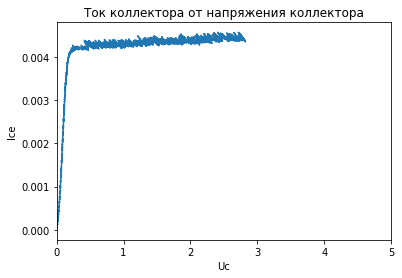

In [177]:
if not is_collector_fixed:
    plt.plot(df['Uce'], df['Ic'])
    plt.title("Ток коллектора от напряжения коллектора")
    plt.xlabel('Uc')
    plt.ylabel('Ice')
    plt.xlim([0,5])